# Task 2: Analysis of the regional market of restaurants in the city of Philadelphia

Team name: La Team

Team members: ALOUF Fares, KWAN Baldur Chin Man, MBELOSON Riana Valera, WANG Dingjia

<!-- Task 2 is more open in nature as there is no specific target. We don’t expect you to analyse all aspects of the problem. You can decide yourself on which approaches, summary statistics or analysis procedures you focus on. Grading will be based on scientific correctness, originality and presentation. -->

## Introduction

The goal of this report is to analyse customer review data to better understand the regional market so that the business owner is more likely to achieve success for the opening of his restaurant in Philadelphia. In particular, we aim to investigate the following questions:

1. An insight on what restaurant consumers generally seem to like (for example in terms of food, service, location, etc…).
2. An analysis of the evolution of food trends in the area over time, in terms of consumer preferences. Do the preferences evolve over time, or do they seem stable?
3. What advice would you give to the new business, based on the findings above?

Given the nature of the task, we will focus on analysing customer reviews about restaurants located in Philadelphia.

In [1]:
# Importing packages
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import os
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")
from task2_funcs import *

## Extracting restaurant reviews in Philadelphia
Before starting the analysis, we will have to obtain the relevant review data. Let's start by importing the data and then inspecting their structures. It is worth mentioning that the reviews in the test data (`ATML2024_reviews_test.csv`) are NOT used in this analysis, since they don't contain the ratings by customers for the businesses which will hinder our ability to know the preferences of restaurants in Philadelphia.

In [2]:
# Importing the dataset
reviews_df = pd.read_csv("datasets/ATML2024_reviews_train.csv")
users_df = pd.read_csv("datasets/ATML2024_users.csv")
business_df = pd.read_csv("datasets/ATML2024_businesses.csv")

### Glimpsing at the data
Below cells show the data types of the columns as well as the first 5 rows of each dataset. Based on the output, in order to extract reviews about restaurants in Philadelphia, we can first filter out businesses who are based in Philadelphia under the `city` column, and then look at those whose categories include restaurants. One crucial thing to note that, however, is that due to the textual nature of the data, there's no guarantee that the `city` column is free of typos or has standardised how Philadelphia is referred to. For example, the city is sometimes referred to as Philly. We shall inspect this column more in detail to ensure that we include the restaurant reviews in different regions of Philadelphia.

We can also notice that some columns aren't in the correct data types and will need to be changed if they're to be used in the following analysis. For instance, the date-related columns (`date` in `reviews_df` and `user_since` in `users_df`) are wrongly marked as `object`, and the `premium_account` column is just a string of years concatenated together which might pose some troubles if we'd like to look like the number of premium users by year. But for now let's focus on filtering restaurant reviews in Philadelphia.

In [3]:
print(reviews_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   id           1050000 non-null  int64 
 1   user_id      1050000 non-null  object
 2   business_id  1050000 non-null  object
 3   rating       1050000 non-null  int64 
 4   useful       1050000 non-null  int64 
 5   funny        1050000 non-null  int64 
 6   cool         1050000 non-null  int64 
 7   text         1050000 non-null  object
 8   date         1050000 non-null  object
dtypes: int64(5), object(4)
memory usage: 72.1+ MB
None


In [4]:
print(tabulate(reviews_df.head(), headers = "keys", tablefmt='orgtbl', showindex=False))

|   id | user_id                | business_id            |   rating |   useful |   funny |   cool | text                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      | date    

In [5]:
print(users_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 747468 entries, 0 to 747467
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             747468 non-null  object 
 1   name                747457 non-null  object 
 2   user_since          747468 non-null  object 
 3   useful              747468 non-null  float64
 4   funny               747468 non-null  float64
 5   cool                747468 non-null  float64
 6   premium_account     57420 non-null   object 
 7   friends             747468 non-null  float64
 8   fans                747468 non-null  float64
 9   compliment_hot      747468 non-null  float64
 10  compliment_more     747468 non-null  float64
 11  compliment_profile  747468 non-null  float64
 12  compliment_cute     747468 non-null  float64
 13  compliment_list     747468 non-null  float64
 14  compliment_note     747468 non-null  float64
 15  compliment_plain    747468 non-nul

In [6]:
print(tabulate(users_df.head(), headers='keys', tablefmt='orgtbl', showindex=False))

| user_id                | name   | user_since          |   useful |   funny |   cool | premium_account                                                   |   friends |   fans |   compliment_hot |   compliment_more |   compliment_profile |   compliment_cute |   compliment_list |   compliment_note |   compliment_plain |   compliment_cool |   compliment_funny |   compliment_writer |
|------------------------+--------+---------------------+----------+---------+--------+-------------------------------------------------------------------+-----------+--------+------------------+-------------------+----------------------+-------------------+-------------------+-------------------+--------------------+-------------------+--------------------+---------------------|
| w7IdXgBVXKjZS5UYDO8cVq | Walker | 2007-01-25 16:47:26 |     7217 |    1259 |   5994 | 2007                                                              |     14995 |    267 |              250 |                65 |                   

In [7]:
print(business_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138210 entries, 0 to 138209
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   business_id  138210 non-null  object 
 1   name         138210 non-null  object 
 2   address      133772 non-null  object 
 3   city         138210 non-null  object 
 4   state        138210 non-null  object 
 5   postal_code  138145 non-null  object 
 6   latitude     138210 non-null  float64
 7   longitude    138210 non-null  float64
 8   attributes   126589 non-null  object 
 9   categories   138136 non-null  object 
 10  hours        117852 non-null  object 
dtypes: float64(2), object(9)
memory usage: 11.6+ MB
None


In [8]:
print(tabulate(business_df.head(), headers = "keys", tablefmt='orgtbl', showindex = False))

| business_id            | name                     | address                         | city         | state   |   postal_code |   latitude |   longitude | attributes                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 | categories                                                                         | hours                                                                                                                                     

### Extracting businesses located in Philadelphia
This [Wikipedia page](https://en.wikipedia.org/wiki/List_of_Philadelphia_neighborhoods) shows that many names of neighbourhoods and districts in the city do not necessarily contain "Philadelphia" (and the code output below shows that the city names are not free of typos...), so simply matching the `city` column with literal strings will probably miss out a considerable amount of businesses. Therefore, we will resort to using ZIP codes to extract businesses located in the city of Philadelphia (credits to [ZipDataMaps](https://www.zipdatamaps.com/en/us/zip-maps/pa/city/borders/philadelphia-zip-code-map) for the full list of ZIP codes used in Philly). 

In [9]:
# Checking how Philadelphia might be referred to
import re
unique_cities = business_df['city'].unique()  
philly_matches = [re.search(r"phi.*", city, flags=re.IGNORECASE) is not None for city in unique_cities]
print(unique_cities[philly_matches])  # Typos...

['Philadelphia' 'Philadephia' 'PHILA' 'Southwest Philadelphia' 'Phila'
 'Philadelphia PA' 'Philadelphila ' 'PHILADELPHIA' 'West Philadelphia'
 'philadelphia' 'Philiidelphia' 'Philly' 'Philadelphia (Northeast Philly)'
 'Philadelphia ' 'Philiadelphia']


In [10]:
# Getting the zip codes of Philadelphia to filter businesses in the city
zip_code_philly = pd.read_excel("datasets/PHILADELPHIA.xlsx")
zip_code_philly["ZIP Code 5"] = zip_code_philly["ZIP Code 5"].astype('string')

# Getting businesses in Philly based on zip codes
zip_code_list = zip_code_philly["ZIP Code 5"].to_list()
business_philly = business_df.query("postal_code in @zip_code_list")
business_philly.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,attributes,categories,hours
2,wm9eoqjytVbC7dQcM4WSTM,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
13,AeNmR681lBdMyqu8eqTTUM,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
17,gCT6F7gqR50heBwQJcaeOR,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
26,g7r5IhhJGdpyFyoWB27NdQ,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","Cocktail Bars, Bars, Italian, Nightlife, Resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
29,Q_dELKJOieBlN9M42zobjM,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,"{'RestaurantsReservations': 'False', 'Caters':...","Pizza, Restaurants, Salad, Soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


### Checking Restaurant-related Businesses
We shall also pre-process the `categories` column to ensure that we do not miss out restaurant-related reviews due to typos. Using regex to look for words containing part of the spelling of restaurants (namely "Rest"), we see that more than one result were returned, of which 3 contain the term 'restaurant.' 

In [11]:
from itertools import chain

# Getting all the distinct business categories 
business_df.loc[:, "categories"] = business_df["categories"].str.lower()
categories_split = chain(*list(business_df["categories"].dropna().str.split(r",\s+", regex=True)))
unique_categories = list(set(categories_split))

# Checking which categories might contain part of the spelling of the word restaurant
resto_matches = [re.search(r"Rest.*", cat, flags = re.IGNORECASE) is not None for cat in unique_categories]
np.array(unique_categories)[resto_matches]

array(['pop-up restaurants', 'damage restoration', 'art restoration',
       'rest stops', 'restaurants', 'restaurant supplies'], dtype='<U36')

Unlike the case of city names where we can resort to zip codes as reference, we need another way to avoid missing out restaurant-related businesses in the dataset. Here, we can use Jaro similarity to check whether restaurants are referred to with similar ways. Mathematically, Jaro similarity $sim_j$ between two strings $s_1 \; \text{and} \; s_2$ is defined as below (a more detailed discussion of the Jaro similairty and its variants can be found [here](https://en.wikipedia.org/wiki/Jaro%E2%80%93Winkler_distance)):

\begin{align}
sim_j = 
\begin{cases}
0 \quad &\text{if} \; m = 0 \\
\frac{1}{3}(\frac{m}{|s_1|} + \frac{m}{|s_2|} + \frac{m-t}{m}) \; &\text{otherwise}
\end{cases},
\end{align}

where $|s_i|$ is the length of the string $s_i$, $m$ is the number of matching characters (characters in $s_1 \; \text{and} \; s_2$ are matching only if they're at most $[\frac{\text{max}(|s_1|, |s_2|)}{2}] - 1$ characters apart), and $t$ is the number of transpositions (i.e. swapping the positions of two characters) which is calculated as number of matching characters not being in the correct order divided by two.

Admittedly, there exist other string distance measures such as the Levenshtein distance as briefly mentioned in class. Nevertheless, we will use Jaro similarity because its output always ranges from 0 to 1 no matter the lengths of the two strings under comparison which makes thresholding easier. Moreover, Jaro similarity satisfies the mathematical definition of a distance metric, whereas its variant Jaro-Winkler similarity violates the triangle inequality.

If we use a threshold of 0.7 for the Jaro score to match the categories, only the top 3 results have their spellings containing the word 'restaurant.' Indeed, only the categories of *restaurants* and *pop-up restaurants* will be relevant for helping the business owners understand the customer preferences of the regional market, as `restaurant supplies` is more about the operation of a restaurant per se rather than on the customer's side. Therefore, we can just extract businesses whose categories are under `restaurants` or `pop-up restaurants` in `business_df`. 

In [12]:
# Checking how many categories can be considered as variants of restaurant-related businesses
jaro_replace_names(unique_categories, "restaurants", threshold = 0.7)

restaurants -> restaurants, score: 1.00
restaurant supplies -> restaurants, score: 0.86
pop-up restaurants -> restaurants, score: 0.78
resorts -> restaurants, score: 0.75
austrian -> restaurants, score: 0.74
arts & crafts -> restaurants, score: 0.74
art space rentals -> restaurants, score: 0.73
party bus rentals -> restaurants, score: 0.73
vegetarian -> restaurants, score: 0.72
rest stops -> restaurants, score: 0.72
aerial tours -> restaurants, score: 0.71
real estate -> restaurants, score: 0.71
race tracks -> restaurants, score: 0.71
southern -> restaurants, score: 0.71
shutters -> restaurants, score: 0.71
fire departments -> restaurants, score: 0.70
attraction farms -> restaurants, score: 0.70


In [13]:
# Getting only restaurant businesses in Philadelphia
business_philly.loc[:, 'categories'] = business_philly['categories'].str.lower()
restaurant_masks = business_philly["categories"].str.contains("restaurants") | business_philly["categories"].str.contains("pop-up restaurants")
resto_philly = business_philly.loc[restaurant_masks, :]
resto_philly.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,attributes,categories,hours
2,wm9eoqjytVbC7dQcM4WSTM,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","restaurants, food, bubble tea, coffee & tea, b...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
13,AeNmR681lBdMyqu8eqTTUM,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,"{'RestaurantsReservations': 'True', 'Restauran...","sushi bars, restaurants, japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-..."
17,gCT6F7gqR50heBwQJcaeOR,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,"{'NoiseLevel': ""u'quiet'"", 'GoodForMeal': ""{'d...","korean, restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20..."
26,g7r5IhhJGdpyFyoWB27NdQ,Bar One,767 S 9th St,Philadelphia,PA,19147,39.939825,-75.157447,"{'Smoking': ""u'no'"", 'NoiseLevel': ""u'average'...","cocktail bars, bars, italian, nightlife, resta...","{'Monday': '16:0-0:0', 'Tuesday': '16:0-0:0', ..."
29,Q_dELKJOieBlN9M42zobjM,DeSandro on Main,4105 Main St,Philadelphia,PA,19127,40.022466,-75.218314,"{'RestaurantsReservations': 'False', 'Caters':...","pizza, restaurants, salad, soup","{'Tuesday': '17:0-21:30', 'Wednesday': '17:0-1..."


### Getting restaurant review data in Philly
We can finally merge the `reviews_df` with `resto_philly` to extract reviews (particularly the ratings) of restaurants located in the city of Philadelphia while also combining the restaurants' information into one table.

In [14]:
# Finally, joining user reviews with restaurant information
resto_reviews_philly = reviews_df.merge(resto_philly, how = "inner", on = "business_id")

# Dropping redundant columns
resto_reviews_philly.drop(columns=['id', 'state'], inplace=True)

We now inspect the restaurant review data to see if more cleaning needs to be done. The data type of the `date` column is defined as `object` which will hinder our ability to analyse changes in customer preferences over time later, so let's convert it into `datetime` type object. By looking at the first few rows of the data, we also notice that the `attributes` column is in json format. It will be good to convert them into something easier to use for subsequent analysis if needed, namely by removing the symbols specific to json format with regex.

Missing values are also present in some columns of our data, and this is relatively the most serious for `hours`. Given the primary task is to make sense of customer preferences for restaurants in Philadelphia, opening hours are likely to be less informative than food style and service for deciding the optimal business strategy to open a new restaurant in the city. Accordingly, we will simply drop the `hours` column first, and then check how many rows will be omitted if we only include rows which contain non-null values in all the other columns.

In [15]:
# Inspecting the data types of the columns
print(resto_reviews_philly.info())
resto_reviews_philly.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103290 entries, 0 to 103289
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      103290 non-null  object 
 1   business_id  103290 non-null  object 
 2   rating       103290 non-null  int64  
 3   useful       103290 non-null  int64  
 4   funny        103290 non-null  int64  
 5   cool         103290 non-null  int64  
 6   text         103290 non-null  object 
 7   date         103290 non-null  object 
 8   name         103290 non-null  object 
 9   address      103162 non-null  object 
 10  city         103290 non-null  object 
 11  postal_code  103290 non-null  object 
 12  latitude     103290 non-null  float64
 13  longitude    103290 non-null  float64
 14  attributes   103227 non-null  object 
 15  categories   103290 non-null  object 
 16  hours        99578 non-null   object 
dtypes: float64(2), int64(4), object(11)
memory usage: 13.4+ MB
None


,user_id,business_id,rating,useful,funny,cool,text,date,name,address,city,postal_code,latitude,longitude,attributes,categories,hours
0,AD2z6qhmVcRJkywa1KsEFG,ADWVkizi8gKjj07mn8NiMe,4,0,0,0,One of my favorite places to grab a quick bit ...,2014-05-28 19:05:26,Chickie's & Pete's,1526 Packer Ave,Philadelphia,19145,39.911417,-75.174511,"{'GoodForKids': 'True', 'Corkage': 'False', 'H...","seafood, nightlife, sports bars, bars, restaur...","{'Monday': '11:0-2:0', 'Tuesday': '11:0-2:0', ..."
1,AS4QOGiUvdbD-ad_SP9cz3,Q1YEMPTZ4GWqzgnMBuaDp1,5,0,0,0,I love this place! There's nothing like authen...,2013-05-28 16:52:23,Guacamole Mex-Grill,4612 Woodland Ave,Philadelphia,19143,39.943971,-75.209914,"{'Caters': 'False', 'RestaurantsAttire': ""u'ca...","mexican, restaurants, specialty food, ethnic f...","{'Monday': '11:0-20:0', 'Tuesday': '11:0-20:0'..."
2,gtRX7g45kDNE6yB4edac7X,gvQz67eUW_EkC1yQC3n0qb,4,2,0,0,Situated on Race street away from the main str...,2014-12-21 15:03:49,Shiao Lan Kung,930 Race St,Philadelphia,19107,39.955247,-75.155409,"{'RestaurantsGoodForGroups': 'True', 'Restaura...","noodles, seafood, restaurants, chinese","{'Tuesday': '15:0-2:0', 'Wednesday': '15:0-2:0..."
3,gHupK3rVLqp_blY_NN9DDM,wbS9zhxRwOxyBd1fWJ5FRI,5,0,0,0,"Outstanding venue, great band, and the food is...",2015-10-17 01:07:26,Amari's Restaurant,5037 Baltimore Ave,Philadelphia,19143,39.947985,-75.224744,"{'HasTV': 'True', 'RestaurantsAttire': ""u'casu...","soul food, american (new), breakfast & brunch,...","{'Wednesday': '7:30-15:0', 'Thursday': '7:30-1..."
4,QZONht3dlg7nCFi1wpoZeU,wRMfTwxM7aFS-MkUnaGQjA,5,4,0,2,We loved our experience at Elwood.\n\nWhen you...,2019-05-04 12:24:05,Elwood,1007 Frankford Ave,Philadelphia,19125,39.966404,-75.134227,"{'RestaurantsReservations': 'True', 'OutdoorSe...","american (traditional), american (new), food, ...","{'Thursday': '17:0-22:0', 'Friday': '17:0-22:0..."


In [16]:
# Converting the date column into datetime data type for easier manipulation
resto_reviews_philly["date"] = pd.to_datetime(resto_reviews_philly['date']).dt.normalize()

# Cleaning attributes
resto_reviews_philly["attributes"] = resto_reviews_philly["attributes"].str.replace(r"\{|\}|'|\"|\bu", "", regex=True)
resto_reviews_philly["attributes"] = resto_reviews_philly["attributes"].str.split(", ")
resto_reviews_philly["attributes"][0][:5]  # I'll leave it like this for now but do further pre-processing if you need to

['GoodForKids: True',
 'Corkage: False',
 'HasTV: True',
 'RestaurantsAttire: casual',
 'RestaurantsTakeOut: True']

If we look at the shape of the `resto_review_philly` dataset after firsting dropping the `hours` columns and then the rows containing any null values, the decrease in the number of observations is only less than 200 which is minimal, so we will just proceed with dropping observations with missing values.

In [17]:
# Dropping the hours column 
resto_reviews_philly.drop(columns=['hours'], inplace = True)

# Checking how many obs we'll lose by dropping rows which contain missing values in any of the columns
resto_reviews_philly.dropna(inplace = True)  
resto_reviews_philly.info()  # The loss in observation is fewer than 200 rows which is minimal 

<class 'pandas.core.frame.DataFrame'>
Index: 103099 entries, 0 to 103289
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   user_id      103099 non-null  object        
 1   business_id  103099 non-null  object        
 2   rating       103099 non-null  int64         
 3   useful       103099 non-null  int64         
 4   funny        103099 non-null  int64         
 5   cool         103099 non-null  int64         
 6   text         103099 non-null  object        
 7   date         103099 non-null  datetime64[ns]
 8   name         103099 non-null  object        
 9   address      103099 non-null  object        
 10  city         103099 non-null  object        
 11  postal_code  103099 non-null  object        
 12  latitude     103099 non-null  float64       
 13  longitude    103099 non-null  float64       
 14  attributes   103099 non-null  object        
 15  categories   103099 non-null  object   

Looking again at the `info()` of the dataset, every columns now has the correct data type, and the missing values are removed. The first 5 rows of the dataset below also shows that our pre-processing steps seemed to work as intended. However, if we would like to use classical machine learning techniques on textual data (namely, `text`, `categories` and potentially `attributes`), then we will need a way to convert them into numerical embeddings which can be understood by computers. 

In [18]:
# Format-wise the data look good
resto_reviews_philly.head()

,user_id,business_id,rating,useful,funny,cool,text,date,name,address,city,postal_code,latitude,longitude,attributes,categories
0,AD2z6qhmVcRJkywa1KsEFG,ADWVkizi8gKjj07mn8NiMe,4,0,0,0,One of my favorite places to grab a quick bit ...,2014-05-28,Chickie's & Pete's,1526 Packer Ave,Philadelphia,19145,39.911417,-75.174511,"[GoodForKids: True, Corkage: False, HasTV: Tru...","seafood, nightlife, sports bars, bars, restaur..."
1,AS4QOGiUvdbD-ad_SP9cz3,Q1YEMPTZ4GWqzgnMBuaDp1,5,0,0,0,I love this place! There's nothing like authen...,2013-05-28,Guacamole Mex-Grill,4612 Woodland Ave,Philadelphia,19143,39.943971,-75.209914,"[Caters: False, RestaurantsAttire: casual, Noi...","mexican, restaurants, specialty food, ethnic f..."
2,gtRX7g45kDNE6yB4edac7X,gvQz67eUW_EkC1yQC3n0qb,4,2,0,0,Situated on Race street away from the main str...,2014-12-21,Shiao Lan Kung,930 Race St,Philadelphia,19107,39.955247,-75.155409,"[RestaurantsGoodForGroups: True, RestaurantsTa...","noodles, seafood, restaurants, chinese"
3,gHupK3rVLqp_blY_NN9DDM,wbS9zhxRwOxyBd1fWJ5FRI,5,0,0,0,"Outstanding venue, great band, and the food is...",2015-10-17,Amari's Restaurant,5037 Baltimore Ave,Philadelphia,19143,39.947985,-75.224744,"[HasTV: True, RestaurantsAttire: casual, DogsA...","soul food, american (new), breakfast & brunch,..."
4,QZONht3dlg7nCFi1wpoZeU,wRMfTwxM7aFS-MkUnaGQjA,5,4,0,2,We loved our experience at Elwood.\n\nWhen you...,2019-05-04,Elwood,1007 Frankford Ave,Philadelphia,19125,39.966404,-75.134227,"[RestaurantsReservations: True, OutdoorSeating...","american (traditional), american (new), food, ..."


In [19]:
resto_reviews_philly.describe()

,rating,useful,funny,cool,date,latitude,longitude
count,103099.000000,103099.000000,103099.000000,103099.000000,103099,103099.000000,103099.000000
mean,3.813296,1.096102,0.368364,0.544205,2015-12-05 20:18:41.423098368,39.961504,-75.160255
min,1.000000,0.000000,0.000000,0.000000,2005-05-26 00:00:00,39.865466,-75.325000
25%,3.000000,0.000000,0.000000,0.000000,2013-06-18 00:00:00,39.947631,-75.171570
50%,4.000000,0.000000,0.000000,0.000000,2016-03-22 00:00:00,39.950956,-75.161770
75%,5.000000,1.000000,0.000000,1.000000,2018-08-19 00:00:00,39.961327,-75.150251
max,5.000000,115.000000,82.000000,112.000000,2022-01-19 00:00:00,40.141488,-74.940729
std,1.303016,2.475243,1.378088,1.794338,NaN,0.035732,0.035684


## Exploring the restaurant reviews data

Now that we have extracted the restaurant review data in Philadelphia, let's start by some exploratory data analysis (EDA) to make sense of the data and (hopefully) find some inspirations of what advice can be given to the business owner. 

### How often are restaurants reviewed by customers?

To begin with, how often is each restaurant reviewed by customers in Philly? The histogram below indicates that only a very small proportion of restaurants have received 100 or more reviews. Indeed, the distribution of the number of reviews per restaurant is remarkably right-skewed. 

<!-- Some EDAs
1. Distribution of the count of reviews per resto
2. 
-->

<!-- Some ideas of the analysis: 
1. Use embeddings on reviews and categories and then run LSA to summarise them as "themes" (e.g., what is a review about in terms of food, service etc.? How can we group many categories into one based on their similarity?) 
2. Analyse how the themes are related to rating to understand what customers like/ don't like about
-->

In [20]:
# Number of reviews per restaurant
review_counts = resto_reviews_philly["name"].value_counts()

fig = px.histogram(review_counts, 
                   title = " Histogram of the number of customer reviews per restaurant in Philadelphia")

fig.update_layout(xaxis_title = "Number of customer reviews", 
                  yaxis_title = "Count of restaurants", 
                  showlegend = False)

fig.show()

In particular, which are the most frequently reviews restaurants in the city? And what are their average ratings and types of restaurant? We can observe from below that the cuisine styles of the top 20 most reviewed restaurants are quite diverse, as there are cafes, Chinese restaurants and steakhouses among other types. Furthermore, most of the restaurants receive average ratings of at least 4. This could imply that customers in Philadelphia tend to give their reviews to restaurants which they like, albeit there is an exception of Geno's Steaks which only has an average rating of around 2.5.

In [21]:
# Getting top 20 restaurants in terms of reviews received
top_20_counts = review_counts[:20]

# Getting average ratings of top 20 restos
top_20_restos = top_20_counts.index
top_20_avg_ratings = resto_reviews_philly.query("name in @top_20_restos").groupby("name")["rating"].mean()

top_20s = pd.DataFrame(data = {"reviews_received": top_20_counts, 
                               "average_rating": top_20_avg_ratings}, 
                       index = top_20_restos)
top_20s

,reviews_received,average_rating
name,,
Reading Terminal Market,888,4.603604
Pat's King of Steaks,624,3.205128
Green Eggs Café,560,3.882143
Sabrina's Café,530,4.173585
Dim Sum Garden,523,3.923518
El Vez,511,4.017613
Geno's Steaks,505,2.493069
Barbuzzo,440,4.279545
Zahav,439,4.526196


Below we also look at the proportion of reviews about the top 20 most reviewed restaurants out of all the restaurants in the dataset. They altogether received about 9% of the reviews from customers in Philadelphia, which is not a small proportion.

In [22]:
unique_restos = resto_reviews_philly["name"].unique()
n_restos = len(unique_restos)
print(f"There are {n_restos} restaurants in Philadelphia under the current dataset, and the top 20 most reviewed restaurants received {sum(top_20s["reviews_received"]) / resto_reviews_philly.shape[0] * 100:.2f}% of reviews.")

There are 4691 restaurants in Philadelphia under the current dataset, and the top 20 most reviewed restaurants received 8.82% of reviews.


### A brief look on the evolution of ratings over time

Apart from the distribution of the number of reviews among restaurants, we can also explore how the customer ratings evolved throughout the period covered by the data. The dates of the reviews are originally recorded on the second level which will be too fine grained for understanding the rating trends. Therefore, we will start by exploring time-related data on a monthly level. For starters, the restaurant reviews covered in this dataset were created from May 2005 to January 2022. 

In [23]:
# Aggregating dates to monthly level
resto_reviews_philly["date"] = resto_reviews_philly["date"].dt.to_period("M").dt.to_timestamp()
resto_reviews_philly["date"].describe()

count                           103099
mean     2015-11-21 03:49:47.260787968
min                2005-05-01 00:00:00
25%                2013-06-01 00:00:00
50%                2016-03-01 00:00:00
75%                2018-08-01 00:00:00
max                2022-01-01 00:00:00
Name: date, dtype: object

It will also be useful to look at how the average ratings evolved throughout this period, and more importantly how many reviews (or observations) there are for each month in the dataset, since this will affect how certain we can say about the food preference of customers. 

In the line plot on the left below, the monthly average rating throughout the period fluctuated around 3.7, albeit there was some erratic movement up to the end of 2007. What could be the reasons? The line plot on the right showing the number of reviews per month might give us an answer, namely, there were very few (sometimes even only a single digit) reviews for each month until December 2007, and thus the variances of the average rating for these months will be higher than subsequent months starting from 2008 when there were substantively more observations. We shall bear this characteristic in mind as we analyse the evolution of food trends in later sections, and we will discuss how to handle this accordingly.

Another interesting observations from the right line plot is that the number of reviews had a sharp drop since February 2020. Given how countries (including the US) responded to the COVID-19 outbreak by lockdowns (one of the measures being the prohibition of dine-in at restaurants), it is then not surprising that customers had fewer (or even no) chances to visit restaurants and thus not able to give as many reviews as before the COVID outbreak. 

In [24]:
# Seeing how the average ratings evolved as a function of time
from plotly.subplots import make_subplots

monthly_avg_rating = resto_reviews_philly.groupby("date")["rating"].apply(np.mean)
monthly_rating_no = resto_reviews_philly.groupby("date")["rating"].count()

monthly_trend = pd.DataFrame({"review_no": monthly_rating_no, 
                              "avg_rating": monthly_avg_rating})

fig = make_subplots(rows = 1, cols = 2)

fig.add_trace(
    go.Scatter(x = monthly_trend.index,
               y = monthly_trend["avg_rating"], 
               mode = "lines", showlegend = False), 
    row = 1, col = 1
)

fig.add_trace(
    go.Scatter(x = monthly_trend.index,
               y = monthly_trend["review_no"], 
               mode = "lines", showlegend = False), 
    row = 1, col = 2
)

fig.update_layout(title_text = "Trends of customer reviews on restaurants from May 2005 to January 2022 in Philadelphia",
                  xaxis1_title = "Time", yaxis1_title = "Average rating", 
                  xaxis2_title = "Time", yaxis2_title = "Number of reviews")

fig.show()

From the above line plots, however, it seems that there still exist quite a bit of fluctuations for the ratings on a monthly level which can make understanding a trend rather difficult. We may therefore need to adjust the time level while looking at the food trends per restaurant category later. Of course, there exist time series analysis techniques to obtain trends even from monthly data, but if there are only few observations for a restaurant category, then these techniques will still suffer from high variance and thus render the predictions (and any inferences) unreliable. In this case, analysing the data on a higher level (e.g. yearly) will be a better option.

## Understanding general restaurant customer preferences


### Pre-processing the reviews
The first important aspect will be to understand what restaurant customers in Philadelphia generally like in terms of food, service or place etc. To begin with, let us remove stopwords (such as prepositions or articles) which will be unlikely to help understand customer preferences in the dataset, lemmatise words so that they are reduced to their meaningful root forms (to avoid a tokeniser treating different forms of the same verb as separate tokens) and then tokenise the reviews.

In [25]:
# importing packages
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora
from gensim.models.ldamodel import LdaModel
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

def preprocess(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalpha() and word not in stop_words]
    return tokens

In [26]:
cleaned_data = [remove_stopwords(review) for review in resto_reviews_philly['text']]
processed_data = [preprocess(review) for review in cleaned_data]
processed_data[:5]

[['one',
  'favorite',
  'place',
  'grab',
  'quick',
  'bit',
  'eat',
  'location',
  'airport',
  'stadium',
  'crab',
  'fry',
  'one',
  'amazing',
  'thing',
  'ever',
  'try',
  'wiz',
  'litteraly',
  'liquid',
  'gold',
  'sure',
  'buy',
  'extra',
  'one',
  'beware',
  'food',
  'menu',
  'typically',
  'greasy',
  'bar',
  'food',
  'stick',
  'crab',
  'fry',
  'golden'],
 ['love',
  'place',
  'nothing',
  'like',
  'authentic',
  'mexican',
  'food',
  'place',
  'placed',
  'order',
  'takeout',
  'pleased',
  'packaged',
  'prepared',
  'chicken',
  'one',
  'pork',
  'meat',
  'plentiful',
  'juicy',
  'loved',
  'homemade',
  'ca',
  'wait',
  'try',
  'menu'],
 ['situated',
  'race',
  'street',
  'away',
  'main',
  'street',
  'chinatown',
  'street',
  'place',
  'appears',
  'nondescript',
  'amongst',
  'neighbor',
  'quality',
  'food',
  'alone',
  'distinguish',
  'would',
  'tread',
  'upon',
  'threshold',
  'pho',
  'xiet',
  'luan',
  'open',
  'wednes

### Finding topics with LDA

The reviews themselves do not have pre-defined themes in the dataset, so we will need a way to identify them. Here, we choose Latent Dirichlet allocation (LDA) to find the topics of reviews. In essence, LDA is a Bayesian-type graphical model used for inferring a pre-defined number of topics in a corpus of documents. The intuition behind this model is that we suppose the documents in our corpus are generated from some latent topics, and each topic is essentially a distribution over the words present in our corpus' vocabulary. Given that we observe the documents as data, we can then reverse engineer the above process to extract the topics in our corpus. A more detailed mathematical discussion of LDA can be found [here](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

In [27]:
#LDA topics model fitting
dictionary = corpora.Dictionary(processed_data)
corpus = [dictionary.doc2bow(text) for text in processed_data]
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=3, random_state=42, passes=15)

After training an LDA model to identify 3 topics in the reviews, and below are the weights of the words in each topic. In short, food quality seems to matter a lot for restaurant customers in Philadelphia (which is not surprising) since words associated with food have their weights being listed below in each topic. Though there are also other elements that customers care about for a restaurant, such as the "place" in the second topic, and something related to the service like order in the third topic. But determining the name for each topic will require to look into some actual reviews. 

In [28]:
for topic in lda_model.print_topics():
    print(topic)

(0, '0.011*"good" + 0.008*"ordered" + 0.008*"dish" + 0.008*"chicken" + 0.008*"sauce" + 0.007*"delicious" + 0.007*"also" + 0.006*"cheese" + 0.006*"like" + 0.006*"got"')
(1, '0.024*"place" + 0.020*"food" + 0.018*"good" + 0.018*"great" + 0.009*"get" + 0.008*"go" + 0.008*"best" + 0.008*"philly" + 0.008*"love" + 0.007*"sandwich"')
(2, '0.014*"food" + 0.011*"time" + 0.009*"u" + 0.008*"order" + 0.008*"place" + 0.008*"would" + 0.008*"like" + 0.008*"one" + 0.007*"table" + 0.007*"get"')


In [29]:
#fit the reviews and get the topics
topics = lda_model.get_document_topics(corpus)

In [30]:
# Getting the topics of each review
def get_lda_topic(lda_list):
    topic = 0
    proba = 0
    
    for i in range(len(lda_list)):
        if lda_list[i][1] > proba:
            topic = i
            proba = lda_list[i][1]
    
    return topic        

# Adding topics to the review data
resto_reviews_philly.insert(resto_reviews_philly.shape[1],'topics',topics)
resto_reviews_philly["topics"] = resto_reviews_philly['topics'].apply(get_lda_topic)

### Looking at the reviews of each topic

It will be useful to look at the actual reviews under each topic, especially for those with high ratings (say above 4 out of 5) in order to understand what customers generally like in addition to determining the name for each topic as mentioned above. Starting with the first topic on food, apart from describing how delicious the food was, customers often mention they like the food because the portions are copious or the prices are affordable.

In [31]:
type0 = resto_reviews_philly[(resto_reviews_philly['topics']==0)&(resto_reviews_philly['rating']>=4)]
for review in type0['text'].sample(3, random_state=42):
    print(review, end = "\n\n\n")

Really great gastropub with a tasty, curated beer list and some innovative cuisine.

We opted for the Caesar salad with steak and some devilled eggs. The salad was very artfully prepared and came with cheesy/creamy croutons which were amazing. 

The eggs were also very good and were served with a small side of beet salad.

The beers were all winners with plenty of options on tap or canned. I had a local saison that was amazing.

Service was very friendly and accommodating.


BEST Meal ....Superb! 
  Gnocchi reopened on June 17. Four of us went there five days later on a Sunday Evening. We were greeted while still on the sidewalk and ushered to a table.  What followed was a dialogue and great contact with the owner chef Sandro......just returned (I understand he opened the original Gnocchi in 1998) after many years in Italy....about 30 miles south of Rome.  He heard that my husband can not do a lot of dairy so he very earnestly said just tell me how you want it and I will make it for yo

If we look at the reviews from the topic of food and place, then customers not only mention the food is of good quality, but also they compliment the ambiance of the restaurant (e.g., the restaurant prepares its environment elegantly, or the restaurant is a good place to hang out with loved ones). 

In [32]:
type1 = resto_reviews_philly[(resto_reviews_philly['topics']==1)&(resto_reviews_philly['rating']>=4)]
for review in type1['text'].sample(3, random_state = 25):
    print(review)
    print("\n")

Good food to try and trying a Spanish food.  It's not authentic but the facility is really trying to prepare elegantly.  Happy hour is good but nothing to be excited about. It's something close to Spanish food but not really but it's good.


Food was INCREDIBLE. John the bartender was attentive and on point. Definitely will recommended to friends when coming to Philly :)


I wish I remembered exactly what it is I always get here.. But I do know this is a necessary stop for my dad whenever he's in town. He gets kind of annoyed that it's a BYO, but there's a state store right down the street for out of towners  that don't come prepared. 
I believe the dish I usually get the fillet tips, which may or may not still be on the menu since I remember getting the enchilada last time I went which was definitely 5/5. 
The staff is extremely helpful and laid back, the perfect place to come with your date, a group of friends, or even your parents!




Lastly, reviews from the third topic mainly revolves around both the food and hospitality of the restaurant. For high-rating reviews, customers not only express their satisfaction with the food but also timely delivery service or good attitudes of the waiters/waitress. 

In [33]:
type2 = resto_reviews_philly[(resto_reviews_philly['topics']==2)&(resto_reviews_philly['rating']>=4)]
for review in type2['text'].sample(3, random_state=12):
    print(review)
    print("\n")

Forever tacos

All the food I've had from here is amazing! I've only had food Togo, so I can't comment on the wait staff, but the food holds up well even for left overs the next day. So, they rule!


We were in town for a conference and desperately needed late night sustenance after a lousy chicken dinner. I ordered through yelp and they were there in half the time it estimated. Delivery guy seemed nice, very polite. The pizza was fantastic. We were big fans of the crust! (There HAS to be something in east coast water!! I don't want to know what it is, but just know you all lead charmed pizza lives over here!!) I also ordered a vanilla shake. Here's where I would normally get picky. However, it was made with vanilla bean ice cream. Perfect. Nuff said. In short, they saved our poor grumbly bellies.


Went out to eat with my cousins during restaurant week. Had no wait. The hostess took my jacket (free coat check) and i awaited in the lounge for my cousins to arrive. I chose to wait for t

Based on the above reviews, we have decided to name each topic as below:

In [34]:
# Mapping each topic to a name
topics_map = {0: "food", 
              1: "food and environment", 
              2: "food and hospitality"}

### What are the reviews mostly about?

Next, we look at how many reviews are in each topic extracted from LDA. This will be useful to see what might be the emphasis for customers when they review a restaurant. It seems that almost half of the reviews care about the location of the restaurant in addition to food quality. For nearly 20% of consumers, they care about service quality besides food quality. But in any case, all the reviews mention food quality explicitly.

In [35]:
topic_counts = resto_reviews_philly.topics.value_counts().reset_index()
topic_counts['topics'] = topic_counts['topics'].replace(topics_map)
topic_counts

,topics,count
0,food and environment,49489
1,food,35095
2,food and hospitality,18515


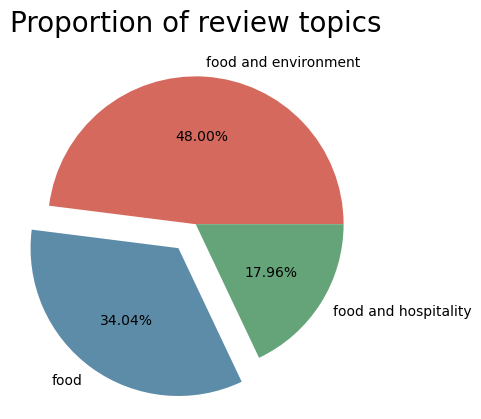

In [36]:
import matplotlib.pyplot as plt
plt.pie(topic_counts["count"], labels=topic_counts["topics"], 
        autopct='%1.2f%%', colors=["#d5695d", "#5d8ca8", "#65a479"],explode=(0, 0.2, 0))

plt.title('Proportion of review topics', size = 20)
plt.show()

Now we also look at the review topics of the most frequently reviewed restaurants. We start with the Reading Terminal Market which is the most reviewed restaurant in Philadelphia throughout the period in the dataset.

In [37]:
restaurant1 = resto_reviews_philly[resto_reviews_philly['name'] == top_20s.index[0]]
top1_topic_counts = restaurant1.topics.value_counts().reset_index()
top1_topic_counts['topics'] = top1_topic_counts['topics'].replace(topics_map)
top1_topic_counts

,topics,count
0,food and environment,728
1,food,130
2,food and hospitality,30


Most of the consumers who reviewed Reading Terminal Market talked about mainly the food and its environment. 

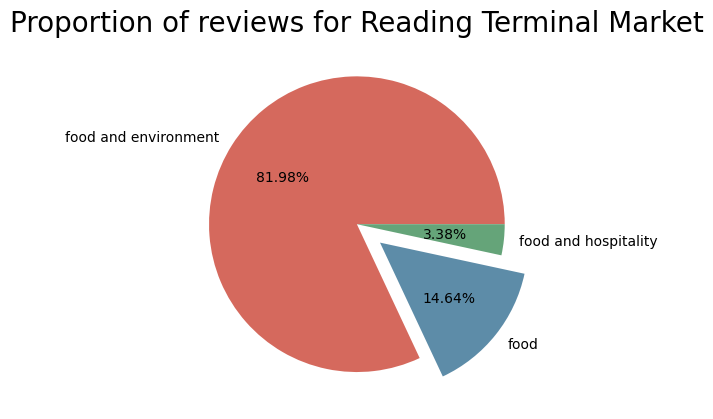

In [38]:
plt.pie(top1_topic_counts['count'], labels=top1_topic_counts['topics'], 
        autopct='%1.2f%%',  colors=["#d5695d", "#5d8ca8", "#65a479"],explode=(0, 0.2, 0))
plt.title('Proportion of reviews for Reading Terminal Market',size=20)
plt.show()

The 2nd-most-reviewed restaurant, Pats King of Steaks, almost has most of its reviews being about its food and environment as Reading Terminal Market does.

In [39]:
restaurant2 = resto_reviews_philly[resto_reviews_philly['name'] == top_20s.index[1]]
top2_counts = restaurant2.topics.value_counts().reset_index()
top2_counts["topics"] = top2_counts["topics"].replace(topics_map)
top2_counts

,topics,count
0,food and environment,440
1,food,119
2,food and hospitality,65


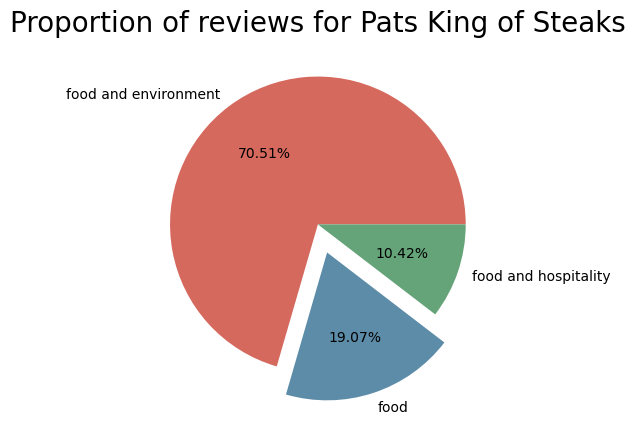

In [40]:
plt.pie(top2_counts["count"], labels=top2_counts["topics"], autopct='%1.2f%%',  
        colors=["#d5695d", "#5d8ca8", "#65a479"],explode=(0, 0.2, 0))
plt.title('Proportion of reviews for Pats King of Steaks', size = 20)
plt.show()

By contrast, the 3rd-most reviewed restaurant has its review topics being more evenly spread out among the three compared to the top 2 most-reviewed restaurants.

In [41]:
restaurant3 = resto_reviews_philly[resto_reviews_philly['name']==top_20s.index[2]]
top3_counts = restaurant3.topics.value_counts().reset_index()
top3_counts['topics'] = top3_counts['topics'].replace(topics_map)
top3_counts

,topics,count
0,food,269
1,food and environment,188
2,food and hospitality,103


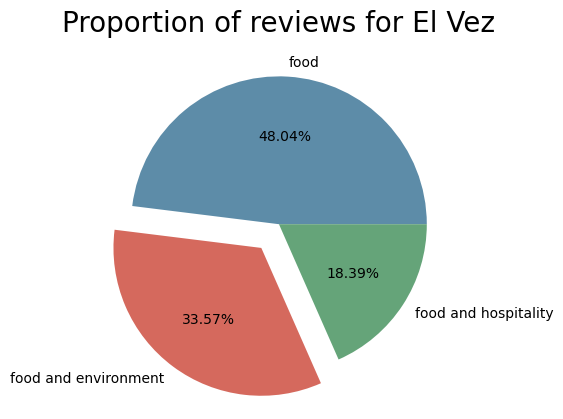

In [42]:
plt.pie(top3_counts['count'], labels=top3_counts['topics'], autopct='%1.2f%%',  
        colors=["#5d8ca8", "#d5695d", "#65a479"],explode=(0, 0.2, 0))
plt.title('Proportion of reviews for El Vez',size=20)
plt.show()

### So what should a good restaurant look like in Philadelphia?

Based on the above findings, we suggest the business owner to focus on these areas of running his restaurants: 

1. The food must be of good quality, affordable and copious. This is because customers who review restaurants in Philly almost always mention the food they had.
2. The environment of the restaurant should make customers feel welcomed to the point that they would like to spend quality time with their loved ones there. Also nice interior decoration will help attract customers.  
3. The hospitality of the restaurant also needs to be good: either the waiters are welcoming to the customers and can make pertinent suggestions on the menu, or food should arrive on time if there is delivery service.

## The evolution of food trends over time

Besides looking at what customers in general like about restaurants, it will be also beneficial to understand whether and how food preferences by customers might change over time. Having knowledge of food trends in Philadelphia can be useful for the business owner to decide which types of restaurant to open so that it is likely to be more profitable in the future.

But how should we define "food trends" with the data we are using? Recall that the `categories` column, now that only restaurant-type businesses are included, contain information about the types of catering services or cuisines a restaurant offers. Accordingly, we will see how the average ratings for categories of restaurants changed over the period of time covered in the dataset. 

Continuing from where we left off about the number of reviews per month in the dataset in the EDA section, we will only analyse the food trends with data from 2008 because the earlier period in the dataset contains too few observations to draw any reliable conclusions about the food trends. 

### Summarising different types of restaurants
Initially, one might just want to directly work on the categories of the restaurants to examine food trends. On a closer look, however, there are over 300 unique categories describing restaurant-related businesses in Philadelphia. Using the categories directly will then make presenting the food trends in a concise manner to the business owner difficult.

In [43]:
# Checking how many categories of restaurants there are in the dataset
resto_reviews_philly["categories"] = resto_reviews_philly["categories"].str.split(r",\s+", regex = True)
resto_cat_list = resto_reviews_philly["categories"].to_list()
unique_resto_types = set(chain(*resto_cat_list))
print(f"There are a total of {len(unique_resto_types)} categories related to restaurants in the dataset.")

There are a total of 368 categories related to restaurants in the dataset.


We would therefore need a way to summarise all the restaurants in Philadelphia as a few major types and then look at how the ratings have evolved for each type throughout the period. Using Cluster analysis, which is one of the unsupervised learning algorithms, to find similar groups (the number being pre-defined) in the data will be very helpful for this task. The first step is to convert the restaurants, whose categories are in texts in the dataset, into some representations that can be understood by clustering algorithms which usually requires numerical inputs. Word embeddings, then, will be very helpful for representing natural language as vectors.

Specifically, below are the steps of using cluster analysis to summarise the restaurants into a few major types:
1. Train word embeddings for the categories of restaurant-related businesses
2. Use the above word embeddings to create an embedding vector of each restaurant
3. Perform clustering of the restaurants and see how many groups fit the restaurants best

#### Model choices
For word embeddings, we will opt for the **Word2Vec** algorithm and train it on the restaurant categories in the dataset. A brief explanation of the above decision: we are training a Word2Vec model here because our task is quite specific, namely, understanding the food preferences of customers in Philadelphia on several major types of restaurants. If we use pre-trained embedding models, then we will likely risk not being able to understand how some categories, having multiple connotations in English, just mean for restaurant categories. For instance, "Chinese" is one category of restaurants included in the dataset, but it can also be used in other contexts such as politics and media, and it is very likely that pre-trained models (usually with a large corpus of diverse documents from the Internet) will not have embeddings for the word "Chinese" solely on its meaning in the catering industry.

We opt for Word2Vec as our embedding model partly because it can be easily trained with personal computers via `gensim`, unlike GloVe which requires using the command line to train or Transformers architectures which are prohibitively expensive for individuals to train on their own computers. Moreover, Word2Vec can capture more nuances of the restaurant categories beyond their similarities than rudimentary embedding methods like the bag of words or TF-IDF which also suffer from sparsity issues that will be detrimental to the performance of clustering. 

Since Word2Vec is already discussed in detail during module 7 of this course, here we will just quickly mention its main characteristics. In essence, Word2Vec (with the skip-gram algorithm) obtains embeddings for each word $v_i$ in the vocabulary $V$ by training a classifier to predict the context words $c_i \in V$ given a target word $w_i \in V$ as the input. The embeddings of a word $v_i \in \mathbb{R}$ (apologies for the abuse of notation) is usually obtained as the sum of its embeddings as target ($w_i \in \mathbb{R}$) and context ($c_i \in \mathbb{R}$) word. The parameter matrices, $W \in \mathbb{R}^{|V| \times d}$ and $C \in \mathbb{R}^{|V| \times d}$, contain the embeddings of all words in $V$ as target and context words, and they are trained via minimising the negative log-likelihood of a multi-nomial distribution over all words as target words. 

As for the clustering algorithm, we will opt for K-Means which aims to minimise the within-cluster sum-of-square (WCSS) of all observations with respect to the centroid of their assigned clusters, where $K$ is the pre-defined number of clusters that the user would like the algorithm to find. The choice of using K-Means here is due to its scalability (even for large sample sizes), ease of interpretation (as we shall see later, we can compare to which tokens each cluster centroid is the most similar to) and its wide application (including [documents grouping](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py)). A detailed discussion of K-Means is beyond the scope of this report, but more information of the algorithm can be found [here](https://scikit-learn.org/stable/modules/clustering.html#k-means). Before implementing the clustering pipeline, we will briefly discuss the details of each step.

#### Training embeddings of restaurant categories

In order to ensure the Word2Vec model has enough training data to adequately learn the semantic meanings of restaurant categories and not overfit, we will train it with observations from the original `business_df`. In other words, we will use all the businesses in `business_df` whose `categories` contain either `restaurants` or `pop-up restaurants` to train the embedding model. From the output below, this method yields over 50,000 training samples for the Word2Vec model (where each sample is the list of categories of a restaurant as a document), which should alleviate concerns about overfitting due to a lack of training data.

An important assumption here is that restaurant categories contain more or less than same meanings across different states in the US, which should be reasonable since it is unlikely for the definitions of cuisine types (e.g. based on nationalities or names of certain food) to vary drastically in different states (or even countries).

In [44]:
# Getting the corpus of the restaurant categories
business_res_mask = business_df["categories"].str.contains("restaurants") | business_df["categories"].str.contains("pop-up restaurants")
res_category_list = business_df.loc[business_res_mask, "categories"].str.split(r",\s+", regex = True).to_list()

# Removing "stop-words" categories since they don't tell us much about how categories differ for each restaurant
stop_words = ["restaurants", "pop-up restaurants", "food"]
res_category_list = [[cat for cat in cat_list if cat not in stop_words] for cat_list in res_category_list]
len(res_category_list)

50223

#### Getting the embeddings for restaurants in Philadelphia
We will also need to convert the restaurants as embedding vectors based on their tokens in `categories` so that we can apply K-means. For simplicity, we will just take the average of the embeddings of all tokens present in a restaurant's categories. 

In [45]:
# A function for converting restaurants into embedding vectors based on its categories
def res2vec(tokens, w2v_model, normalize = True):
    """Returns the embedding of a restaurant-related business as the mean of the tokens/words embeddings of its categories."""
    
    embeddings = []
    
    for token in tokens:
        try:
            embeddings.append(w2v_model.wv.get_vector(token, norm=normalize))
        except KeyError:
            continue
    
    return np.array(embeddings).mean(axis = 0) if len(embeddings) > 0 else np.zeros(shape = w2v_model.vector_size)

Below we extract all the distinct restaurants and their associated categories from the data. However, it seems that there are restaurants which have more than one entry of their categories in the data. If we look at the case of Taco Bell, then we observe that some categories are only present in some review entries or ordered in a different way, causing certain restaurants to have multiple entries of categories. Even more weirdly, Taco Bell is categorised as "italian" in one instance even though it is a Mexican fast food chain.

In [46]:
# Getting all the distinct restaurants and their respective categories
resto_reviews_philly["categories"] = resto_reviews_philly["categories"].apply(tuple)  
res_categories_df = resto_reviews_philly[["name", "categories"]].drop_duplicates()
res_categories_df.shape  # number of rows doesn't match with number of distinct restaurants...

(5294, 2)

In [47]:
# Restaurants having more than one entry for categories
restaurant_counts = res_categories_df["name"].value_counts()
print(restaurant_counts.head()) 

# How Taco Bell has different entries for categories
res_categories_df.query("name == 'Taco Bell'")

name
Wawa                         35
McDonald's                   30
Dunkin'                      20
Popeyes Louisiana Kitchen    16
Taco Bell                    14
Name: count, dtype: int64


,name,categories
6722,Taco Bell,"(mexican, tacos, restaurants, tex-mex, breakfa..."
10292,Taco Bell,"(italian, restaurants, tex-mex, fast food, piz..."
10791,Taco Bell,"(restaurants, mexican, tacos, tex-mex, breakfa..."
15087,Taco Bell,"(mexican, breakfast & brunch, tacos, fast food..."
15761,Taco Bell,"(restaurants, breakfast & brunch, tacos, fast ..."
16033,Taco Bell,"(restaurants, breakfast & brunch, tacos, mexic..."
25522,Taco Bell,"(restaurants, tex-mex, mexican, fast food, tacos)"
28671,Taco Bell,"(mexican, restaurants)"
33631,Taco Bell,"(restaurants, mexican)"
36756,Taco Bell,"(restaurants, fast food, mexican, tex-mex, tacos)"


A possible reason might be that the categories of the restaurants are determined by user inputs, so there exist discrepancies about the categories of the restaurants in the original dataset. To remedy this, we can take the average of the embedding vectors of a restaurant if it has more than one list of categories. An advantage is that this can wash out the contribution of erroneous categories to the embeddings of a restaurant (in Taco Bell's case, this would be Italian).

<!-- 
    # # Creating word embedding model for restaurant categories
    # res_names = res_cats_df["name"]
    # res_categories = res_cats_df["categories"].to_list()

    # # Creating embedding for each restaurant
    # embeddings_df = {}
    
    # for res, cat_list in zip(res_names, res_categories):
        
    #     res_embed = res2vec(cat_list, w2v_model)
    #     embeddings_df[res] = res_embed
        
    #     # Removing restaurant-related businesses whose all categories appear too few times in the corpus
    #     if all(embeddings_df[res] == np.zeros(shape = w2v_model.vector_size)):
    #         del(embeddings_df[res])
            
    # embeddings_df = pd.DataFrame({"name": embeddings_df.keys(), 
    #                               "embeddings": embeddings_df.values()})
    
    # return embeddings_df
    
# def combine_cats(restaurants_df):
    
#     res_cats_df = {}
    
#     for res in restaurants_df["name"]:
#         res_df = restaurants_df.query("name == @res")
#         res_cats_df[res] = set(chain(*res_df["categories"]))
    
#     res_cats_df = pd.DataFrame({"name": res_cats_df.keys(), 
#                                 "categories": res_cats_df.values()})
    
#     return res_cats_df
    
# res_categories_df = combine_cats(res_categories_df)
# assert res_categories_df.shape[0] == n_restos-->

In [48]:
# Getting the embeddings for every restaurant
def get_resto_embeddings(res_cats_df, w2v_model):
    
    # Getting the embedding for each row of categories
    embeddings_df = pd.DataFrame({"name": res_cats_df["name"], 
                                  "embeddings": res_cats_df["categories"].apply(res2vec, w2v_model = w2v_model)})
    
    # Getting the average embeddings by restaurant
    embeddings_avg = embeddings_df.groupby("name")['embeddings'].mean()
    embeddings_avg = pd.DataFrame({"name": embeddings_avg.index, 
                                   "embeddings": embeddings_avg.values})
    
    return embeddings_avg

#### Hyperparameter tuning
We will now put all the above preliminary steps together and then train a clustering model on the restaurants in Philadelphia. The main hyperparameters in this clustering pipeline will be:

* Number of clusters $k$ that K-means will form 
* The window size $l$ which determines the size of the context around a target word

Admittedly, there also exist other hyperparameters to be tuned, such as the number of negative samples for each valid pair of center and context word as well as the embedding dimension for each token. Due to computational constraints, however, we will not tune them here. Instead, unless otherwise specified, we will use the default values in the `Word2Vec` class implemented in `gensim`. That being said, we changed some default parameters:

* The initial learning rate $\alpha$ for Stochastic Gradient Descent in training Word2Vec is changed to 0.01 to avoid diverging from the local optima during early iterations
* We used skip-gram as the algorithm for Word2Vec
* We increased the embedding dimensions of each token to 300. Overfitting should be unlikely given the relatively large amount of documents (i.e. list of categories) available for training
  
Below we will tune the two hyperparameters considered in our clustering pipeline. Specifically, we will use the [within-cluster sum-of-square (WCSS)](https://scikit-learn.org/stable/modules/clustering.html#k-means) as well as the [Silhouette Coefficient](https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient) to quantitatively compare how well each pair of hyperparameters performs in grouping the restaurants as a start to see where the optimal range of hyperparameters might lie. 

In essence, both of these metrics aim to measure how close the observations are to the centroid of their assigned clusters. A smaller WCSS means observations are closely grouped within their clusters and far away from other clusters, whereas a Silhouette Coefficient close to 1 indicates that clusters are densely grouped together, 0 indicates clusters are overlapping, and -1 means the clusters are incorrectly assigned since the observations are actually closer to the centroid of another cluster than that of their assigned one.

In [49]:
from gensim.models import Word2Vec
from sklearn.cluster import KMeans

# Function for clustering restaurants
def cluster_restaurants(embeddings_df, k, seed_clus = 1):
        
    # Fitting K-means
    k_means = KMeans(n_clusters = k, random_state = seed_clus)
    k_means.fit(np.vstack(embeddings_df["embeddings"]))
    
    return k_means

def cluster_pipeline(res_df, l, k, seed_w2v = 1, seed_clus = 1):
    
    # Training a word2vec model
    w2v_model = Word2Vec(res_category_list, window = l, sg = 1, min_count = 5, vector_size = 300,
                         alpha = 0.01, min_alpha = 0.0001, epochs = 30, workers = 1, seed = seed_w2v)
        
    # Getting the restaurant embeddings
    embeddings = get_resto_embeddings(res_df, w2v_model)
    
    # Clustering    
    k_means = cluster_restaurants(embeddings, k = k, seed_clus = seed_clus)
    embeddings['cluster'] = k_means.labels_
    
    return w2v_model, embeddings, k_means

We will consider the following ranges for the hyperparameters: 

* $l \in \{\mathbb{Z} \; : \; 1 \leq l \leq 10\}$
* $k \in \{\mathbb{Z} \; : \; 2 \leq l \leq 30\}$

In [50]:
# Tuning the clustering pipeline
from sklearn.metrics import silhouette_score
max_l = 10
max_k = 30
window_sizes = np.arange(1, max_l + 1)
k_clusters = np.arange(2, max_k + 1)

# Index 0 on the first axis refers to l = 1
# Index 0 on the second axis refers to k = 2
inertia_mat = np.zeros(shape = (len(window_sizes), len(k_clusters)))
silhouette_mat = np.zeros(shape = (len(window_sizes), len(k_clusters)))

# Grid search based on WCSS
for l in window_sizes:
    for k in k_clusters:
        os.environ['PYTHONHASHSEED'] = '0'
        _, embeddings, k_means = cluster_pipeline(res_categories_df, l, k)
        inertia_mat[l - 1, k - 2] = k_means.inertia_
        silhouette_mat[l - 1, k - 2] = silhouette_score(np.vstack(embeddings["embeddings"]), k_means.labels_)

From the line plot below, we can observe that for a given number of clusters $k$, the WCSS is usually the lowest when the window size $l = 1$ (i.e. restaurants in each cluster are more concentrated around their centroid). However, there does not seem to be a noticeable elbow in the WCSS for all the window sizes considered. Using the elbow method to pick the number of clusters might prove difficult in this case.

Then let us also consider the Silhouette coefficient for different pairs of hyperparameters. Overall, the Silhouette scores are positive but not very far away from 0. This makes sense because some categories of food can indeed be shared by different types of restaurants (for example, think about pizza which can be both fast food and a dish in a quality Italian restaurant). From the right line plot below, we can notice that quite a bit of K-means models achieve similar silhouette scores. We therefore would need a way to pick a simpler model which will be easier to present to the business owner.

In [51]:
from plotly.colors import DEFAULT_PLOTLY_COLORS
cols = DEFAULT_PLOTLY_COLORS
fig = make_subplots(rows = 1, cols = 2, 
                    subplot_titles = ["WCSS", "Silhouette Score"])

for l in window_sizes:
    fig.add_trace(go.Scatter(
        x = k_clusters, y = inertia_mat[l - 1],
        name = f"l = {l}", line = dict(color = cols[l - 1])), 
                  row = 1, col = 1)
    
    fig.add_trace(go.Scatter(
        x = k_clusters, y = silhouette_mat[l - 1],
        name = f"l = {l}", showlegend = False, line = dict(color = cols[l - 1])),
        row = 1, col = 2)
    
fig.update_layout(title_text = "Diagnostics of K-means clustering with Word2Vec embeddings for finding major restaurant types", 
                  xaxis_title = "Number of clusters", yaxis_title = "WCSS", 
                  xaxis2_title = "Number of clusters", yaxis2_title = "Silhouette Score")

Heuristically, we will choose a K-means model with the lowest number of clusters (which corresponds to a simpler K-Means model because we are able to group similar restaurants together with fewer clusters) whose Silhouette score is over the 90th percentile of all the models considered. Eventually, the lowest number of clusters which achieves the required Silhouette score is $ k = 19$ for window sizes of 2, 3, 4 and 7. We will therefore use the pipeline with the smallest window size in the Word2Vec model (which is 2 in our case), i.e. we will choose the set of hyperparameters as $l = 2$ and $k = 19$. 

The reason for which a Word2Vec model with a smaller window size can be considered as simpler is because it only captures the immediate context around a target word, whereas a larger window size is more complex since it also captures the broader context of a target word beyond its imminent context words and can introduce more noise to the final trained embeddings.

In [52]:
# Checking which K-means model satisfies our criterion
silhouette_90perc = np.percentile(silhouette_mat, 90)
print(f"The 90th percentile of Silhouette Scores of all the models is {silhouette_90perc:.4f}.")

# Which pairs of hyper-params satisfiy our criterion?
np.unravel_index(np.where(silhouette_mat > silhouette_90perc), silhouette_mat.shape)

The 90th percentile of Silhouette Scores of all the models is 0.2655.


(array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0]], dtype=int64),
 array([[ 0,  0,  1,  1,  1,  1,  2,  2,  3,  3,  3,  4,  6,  6,  6,  6,
          6,  6,  6,  7,  8,  9,  9,  9,  9,  9,  9,  9,  9],
        [19, 20, 17, 18, 21, 23, 16, 17, 17, 19, 20, 21, 17, 18, 19, 20,
         21, 22, 23, 25, 18, 18, 19, 20, 21, 22, 23, 24, 25]], dtype=int64))

In [53]:
# Setting the optimal hyper-params
opt_l = 2
opt_k = 19

# Fitting the optimal Word2Vec and K-means models
os.environ['PYTHONHASHSEED'] = '0'
w2v_opt, embeddings_opt, kmeans_opt = cluster_pipeline(res_categories_df, l = opt_l, k = opt_k)

Let us now examine the K-means pipeline with the selected set of hyper-parameters. Starting with the Word2Vec model with $l = 2$, given that we do not have the ground truth of the major types of restaurants in our dataset, doing qualitative (albeit heuristic) checks might inform us whether it can capture the semantic meanings of the categories. The tests below seem to suggest that the trained Word2Vec model can capture the semantic similarities and differences between categories of restaurants rather well.

In [54]:
# Similarity checks
print(w2v_opt.wv.most_similar("chinese"))  # Quite good since the most similar categories are either food from China or other Asian cuisine styles
print(w2v_opt.wv.most_similar("hot dogs"))  # Grouped with other comfort food which makes sense
print(w2v_opt.wv.most_similar("fast food"))  # cheesesteak is a local fast food in Philly

[('hot pot', 0.8225931525230408), ('pan asian', 0.8172761797904968), ('noodles', 0.7862551212310791), ('dim sum', 0.7793183326721191), ('singaporean', 0.7711607813835144), ('cantonese', 0.7710580825805664), ('mongolian', 0.7700840830802917), ('malaysian', 0.7687665820121765), ('shanghainese', 0.7581511735916138), ('szechuan', 0.7568654417991638)]
[('pretzels', 0.7833551168441772), ('shaved ice', 0.7341762781143188), ('ice cream & frozen yogurt', 0.7066194415092468), ('beverage store', 0.6909295916557312), ('poutineries', 0.6840118169784546), ('pancakes', 0.6758134365081787), ('shaved snow', 0.6505566239356995), ('gelato', 0.6452885270118713), ('waffles', 0.6372516751289368), ('armenian', 0.6252309679985046)]
[('cheesesteaks', 0.6558142304420471), ('pancakes', 0.5981360077857971), ('poutineries', 0.5878260731697083), ('gas stations', 0.5716492533683777), ('wraps', 0.5445719957351685), ('hot dogs', 0.5383703112602234), ('convenience stores', 0.5360121726989746), ('shaved ice', 0.53285908

In [55]:
# Similarity checks
print(w2v_opt.wv.similarity("chinese", "italian"))  # Not similar as expected
print(w2v_opt.wv.similarity("chinese", "dim sum"))  # Similar as expected 

0.3480187
0.77931845


In [56]:
# Odd-one-out identification
print(w2v_opt.wv.doesnt_match(["chinese", "dim sum", "hot dogs"]))  # Makes sense
print(w2v_opt.wv.doesnt_match(["chinese", "pizza", "hot dogs"]))  # Makes sense
print(w2v_opt.wv.doesnt_match(["chinese", "japanese", "italian"]))  # Italian is an European cuisine style

hot dogs
chinese
italian


We now move onto examining the K-Means model with $k = 19$ clusters. Overall, each of the cluster centroids seem to resemble a major type of restaurants (e.g. Asian style for the 3rd centroid), even though there are some overlappings for some centroids, such as the 11th and 14th clusters have their centroids being the most similar to tokens about Japanese food at the same time. For easier interpretation, we will give names to each cluster based on the most similar tokens to the centroid. To deal with overlapping clusters, we will simply rename the labels of two clusters as the same if they share very similar tokens to their centroids. 

Finally, for clusters whose centroid is not similar to tokens which all point to a single type of cusine, we will name that cluster as "Others." Admittedly, the fact that some centroids don't have a distinguished theme might be due to the limitations of K-Means in favouring spherical clusters. Future analysis should try using other clustering algorithms to see if more separated clusters can be obtained. But for now we will proceed with this model.

In [57]:
# Inspecting the centroids of the K-means model 
for centroid in kmeans_opt.cluster_centers_:
    print(w2v_opt.wv.most_similar(centroid))
    
# Renaming the cluster labels to be more informative
cluster_name_map = {0: "Americans", # North and South Americas
                    1: "Pastry and cafe", 
                    2: "Chinese", 
                    3: "Fast food",
                    4: "Fast food", 
                    5: "SE Asian or African",  # SE for Southeast
                    6: "Italian", 
                    7: "Nightlife", 
                    8: "Asian", 
                    9: "Middle Eastern", 
                    10: "Japanese", 
                    11: "Grill and seafood", 
                    12: "Ready to eat", 
                    13: "Japanese", 
                    14: "Latin American",
                    15: "Others",
                    16: "Others",
                    17: "Asian",
                    18: "NA and bars"}  # NA for North America

[('caribbean', 0.9244996309280396), ('puerto rican', 0.912581741809845), ('dominican', 0.8724308013916016), ('argentine', 0.8557023406028748), ('colombian', 0.8476459383964539), ('haitian', 0.8425798416137695), ('peruvian', 0.8419398665428162), ('portuguese', 0.8338672518730164), ('honduran', 0.8336353302001953), ('empanadas', 0.8299190998077393)]
[('patisserie/cake shop', 0.8425578474998474), ('pancakes', 0.8283005356788635), ('cafeteria', 0.8246520161628723), ('custom cakes', 0.8198431134223938), ('coffee roasteries', 0.8182864785194397), ('australian', 0.8132022619247437), ('internet cafes', 0.8125404715538025), ('bagels', 0.7925485372543335), ('macarons', 0.7875133156776428), ('coffee & tea', 0.7842460870742798)]
[('chinese', 0.998726487159729), ('hot pot', 0.8455902338027954), ('pan asian', 0.8383983373641968), ('dim sum', 0.8081594705581665), ('noodles', 0.8038660883903503), ('cantonese', 0.7991191148757935), ('mongolian', 0.7967877984046936), ('singaporean', 0.7935535311698914),

In [58]:
# Replacing the integer cluster labels 
embeddings_opt["cluster"] = embeddings_opt["cluster"].replace(cluster_name_map)
embeddings_opt.head()

,name,embeddings,cluster
0,&pizza - UPenn,"[0.014605579, -0.030275494, -0.007705603, 0.00...",Others
1,&pizza - Walnut,"[0.014605581, -0.030275494, -0.007705603, 0.00...",Others
2,10 Arts Bistro,"[-0.017004436, 0.055651456, 0.016794669, 0.072...",Nightlife
3,1100 Social,"[-0.022028863, 0.040284637, 0.02793406, 0.0793...",Nightlife
4,1201 Bar,"[-0.025388308, 0.030156448, 0.0014370226, 0.06...",Nightlife


### Looking at the food trends over time
With the major restaurant types being identified by cluster analysis, we can now look at the food trends in Philadelphia over time. As mentioned in the EDA section, we will not include data before 2008 due to the lack of enough observations to draw reliable conclusions about the trends during this period. 

Moreover, while we initially tried analysing the food trends on a monthly level, some types of restaurants lacked sufficient amounts of observations per month, such as `Chinese` only having 21 observations in 2008 as shown below (which on average there were only fewer than 2 reviews per month in that year). We therefore had to aggregate our analysis of food trends to the yearly level, and this implies we should not include 2022 since there is only one month of data (i.e. January) present in the dataset for this year.

In [59]:
# Mapping restaurants into their clusters
res_cluster_map = dict(zip(embeddings_opt["name"], embeddings_opt["cluster"]))
resto_reviews_philly["cluster"] = resto_reviews_philly["name"].replace(res_cluster_map)

# Filtering out reviews before 2008
resto_post_2008 = resto_reviews_philly.query("date >= '2008-01-01' and date < '2022-01-01'")
resto_post_2008["date"] = resto_post_2008["date"].dt.to_period("Y").dt.to_timestamp()
resto_post_2008.head()

,user_id,business_id,rating,useful,funny,cool,text,date,name,address,city,postal_code,latitude,longitude,attributes,categories,topics,cluster
0,AD2z6qhmVcRJkywa1KsEFG,ADWVkizi8gKjj07mn8NiMe,4,0,0,0,One of my favorite places to grab a quick bit ...,2014-01-01,Chickie's & Pete's,1526 Packer Ave,Philadelphia,19145,39.911417,-75.174511,"[GoodForKids: True, Corkage: False, HasTV: Tru...","(seafood, nightlife, sports bars, bars, restau...",1,Nightlife
1,AS4QOGiUvdbD-ad_SP9cz3,Q1YEMPTZ4GWqzgnMBuaDp1,5,0,0,0,I love this place! There's nothing like authen...,2013-01-01,Guacamole Mex-Grill,4612 Woodland Ave,Philadelphia,19143,39.943971,-75.209914,"[Caters: False, RestaurantsAttire: casual, Noi...","(mexican, restaurants, specialty food, ethnic ...",1,Others
2,gtRX7g45kDNE6yB4edac7X,gvQz67eUW_EkC1yQC3n0qb,4,2,0,0,Situated on Race street away from the main str...,2014-01-01,Shiao Lan Kung,930 Race St,Philadelphia,19107,39.955247,-75.155409,"[RestaurantsGoodForGroups: True, RestaurantsTa...","(noodles, seafood, restaurants, chinese)",2,Asian
3,gHupK3rVLqp_blY_NN9DDM,wbS9zhxRwOxyBd1fWJ5FRI,5,0,0,0,"Outstanding venue, great band, and the food is...",2015-01-01,Amari's Restaurant,5037 Baltimore Ave,Philadelphia,19143,39.947985,-75.224744,"[HasTV: True, RestaurantsAttire: casual, DogsA...","(soul food, american (new), breakfast & brunch...",1,Others
4,QZONht3dlg7nCFi1wpoZeU,wRMfTwxM7aFS-MkUnaGQjA,5,4,0,2,We loved our experience at Elwood.\n\nWhen you...,2019-01-01,Elwood,1007 Frankford Ave,Philadelphia,19125,39.966404,-75.134227,"[RestaurantsReservations: True, OutdoorSeating...","(american (traditional), american (new), food,...",0,Others


In [60]:
# Scarcity of observations for some types of restaurants in certain years
ratings_count_per_month = resto_post_2008.groupby(["date", "cluster"])["rating"].count().reset_index()
ratings_count_per_month

,date,cluster,rating
0,2008-01-01,Americans,38
1,2008-01-01,Asian,127
2,2008-01-01,Chinese,21
3,2008-01-01,Fast food,199
4,2008-01-01,Grill and seafood,35
...,...,...,...
205,2021-01-01,Nightlife,1485
206,2021-01-01,Others,766
207,2021-01-01,Pastry and cafe,447
208,2021-01-01,Ready to eat,191


We now look at the yearly average rating of each major type of restaurants from 2008 to 2021. Starting with the first half of the major restaurant types, here are a few observations:

* Throughout this period, customers in Philadelphia seemed to become more favourable towards restaurants of types Nightlife, Others (though the types of restaurants included in this cluster are very diverse so it will be difficult to pinpoint exactly what customers like), Asian, Italian as well as Pastry and cafe. The increases in the ratings of these types of restaurants also seemed stable (except there was a drop in ratings for Italian restaurants in 2016, but it bounced back quickly a year later).

* By contrast, the ratings for Chinese, Latin American and fast food types of restaurants seemed to have more fluctuations throughout this period. In particular, the average ratings by year for fast food are the lowest for all of the restaurant types identified by cluster analysis. Still, Chinese restaurants has become more favoured by customers in Philly since 2019.

In [61]:
# Plotting average ratings by cluster per month
ratings_per_cat_month = resto_post_2008.groupby(["date", "cluster"])["rating"].mean().reset_index()
unique_clus_name = resto_post_2008.cluster.unique()

# Indices for plotting purpose
half_n = len(unique_clus_name) // 2 + 1
row_idx = 1

fig = make_subplots(rows = 2, cols = 4, 
                    x_title="Month", y_title="Rating", 
                    subplot_titles = unique_clus_name[:half_n])

for i, clus in enumerate(unique_clus_name[:half_n]):
    
    col_idx = (i + 1) - 4 * (row_idx - 1)
    
    clus_ratings = ratings_per_cat_month.query('cluster == @clus')
    
    fig.add_trace(
        go.Scatter(x = clus_ratings.date,
                   y = clus_ratings.rating,
                   mode = "lines", 
                   name = clus, 
                   showlegend = False), 
        row = row_idx, col = col_idx
    )
    
    if col_idx % 4 == 0:
        row_idx += 1

fig.update_layout(title_text = "Average ratings of each major type of restaurant by month from 2008 to 2021 (part 1)")
fig.show()

We now look at the average yearly ratings of the other half of the restaurant types and observe the followings:

* On one hand, we can observe a steady increase of average ratings for Middle Eastern, Japanese, Southeast Asian or African as well as North American restaurants and bars. An interesting observation is that the average ratings of North-American style restaurants and bars have been increasing since 2010 despite their initial setbacks on ratings from 2008.

* On the other hand, grill and seafood type of restaurants became less favoured by customers before 2010, and its average ratings have remained at a low level afterwards without any bounce backs. 
  
* Meanwhile, Ready to eat and Americas restaurants had their average ratings dropping considerably from 2020 to 2021, despite their rather stable average ratings in the years before.

In [62]:
# Plotting the other half of the clusters
row_idx = 1

fig = make_subplots(rows = 2, cols = 4,
                    x_title="Year", y_title="Rating",
                    subplot_titles=unique_clus_name[half_n:])

for i, clus in enumerate(unique_clus_name[half_n:]):
    
    col_idx = (i + 1) - 4 * (row_idx - 1)
    
    clus_ratings = ratings_per_cat_month.query('cluster == @clus')
    
    fig.add_trace(
        go.Scatter(x = clus_ratings.date,
                   y = clus_ratings.rating,
                   mode = "lines", 
                   name = clus, 
                   showlegend = False), 
        row = row_idx, col = col_idx
    )
    
    if col_idx % 4 == 0:
        row_idx += 1

fig.update_layout(title_text = "Average ratings of each major type of restaurant by month from 2008 to 2021 (part 2)")
fig.show()

Based on the above observations on the food trends, here are several recommendations to the business owner in choosing which type(s) of restaurants to open in Philadelphia:

1. Ideal investment options will be restaurant types which are viewed more and more positively by customers and received high average ratings (such as being above 4 out of 5) throughout 2008 to 2021 as mentioned above. 
   * When choosing among these restaurants types, other major considerations might include:
       * Operation costs (as running a restaurant with nightlife or bar elements will require more expenditure on security to deal with drunk customers)
       * Difficulty in recruiting chefs (such as hiring an experience sushi chef might be hard and expensive), and also 
       * Whether the price range of the type of restaurants matches with the purchasing power of the usual customers in a given region in the city (a high-end Japanese restaurant, for example, will be unlikely to have a sustainable source of customers if opened in suburb areas).  
   
2. Investing in ready to eat or Americans restaurants is likely to be risky since their average ratings have dropped considerably in recent years. The reason behind these sharp drops are not clear for now, but it is advised to not invest into these restaurant types for now, especially if these drops would actually be the onset of customer preference shifting away from these restaurant types in the long run.

3. The average ratings for fast food as well as grill and seafood restaurants were generally lower than other types of restaurants in the period under analysis, and these lower-than-average trends seemed stable. Therefore, it is not advised to invest into these restaurant types since customers in Philadelphia seem to not like them in the first place.
   * For fast food type of restaurants, it will be even more delicate given the presence of major fast food chains (e.g. Taco Bell) which have considerable advantages over small fast food restaurants in terms of economies of scale, to name a few

Lastly, a limitation in our analysis is that the two clusters under the label "Others" were not well separated by K-Means, and thus the tokens similar to their centroids do not indicate a clear type of restaurants altogether. Future room for improvement will surely involve playing with other clustering or embedding algorithms to see if better clustering results can be obtained.

## Conclusion

In this report, we analysed the regional market of restaurants in Philadelphia for the purpose of informing a business owner and his investors to open a restaurant in the city which is more likely to be profitable in the future. Specifically, our analysis focused on two major aspects:

1. The general preferences of restaurant customers
2. The evolution of food trends over time in terms of the ratings of different types of restaurants

For analysing the first aspect, we used LDA to extract 3 latent topics in the restaurant reviews. The topics altogether suggest that consumers always care about the food quality, but the environment and hospitality of a restaurant also matter to some. In order to be an appealing restaurant to customers, then it is important to have good food with copious portions and affordable prices, an environment which is nicely decorated and has a welcoming ambiance, and the service must be professional (which means competent and agreable waiters or timely delivery services).

As for the second aspect, we made use of Word2Vec to convert a restaurant into numerical embeddings based on its categories and then adopted K-means to cluster the restaurants into different major types. Although there is certainly room for improvement in terms of the clustering performance, we were still able to extract some major types of restaurants in Philadelphia and then examined how their average ratings evolved yearly from 2008 to 2021. Hopefully, this analysis can lead to a choice of restaurant to open by the investors which will be favoured by customers in the city in the long run.

Even though analysing customer preferences is a crucial part for deciding any business strategies, more research should also be done on the supply side. For instance, it is imperative that the business owner find a reliable and cost-effective restaurant supplier for the operating resources of the restaurant. Indeed, the `restaurant supplies` category in the `business_df` might be of use. 